<a href="https://colab.research.google.com/github/mflagosv25/Talento-Tech/blob/main/Ejercicios%20y%20Tareas/Tarea_calculo_Errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuaderno de Regresión

Con este cuaderno se estudiarán métodos de regresión empleando diferentes técnicas para calcular la regresión. También se eplearán modelos pre existentes en la librería scikit-learn
para analizar el dataset ice_cream_revenue

## Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo
En la primera sección se emplearán modelos de regresión encontrados con el método de mínimos cuadrados que se basa en encontrar la solución óptima para un problema de la forma
$$ Ax=b $$ y puede ser resuelto con álgebra lineal.


## Sección 2: Análisis y  Regresión del dataset Ice-cream-revenue
### 2.1 Análisis exploratorio de los datos

Se empleará el dataset ice-cream-revenue que tiene las columnas de temperatura y cantidad vendida de helados. Utilizando scikit-learn se crearán modelos de regresión. El dataset se preprocesará para poder tener datos de evaluación del modelo


In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np

In [ ]:
df_helados = pd.read_csv("IceCreamData.csv")
df_helados.head()


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df_helados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df_helados.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


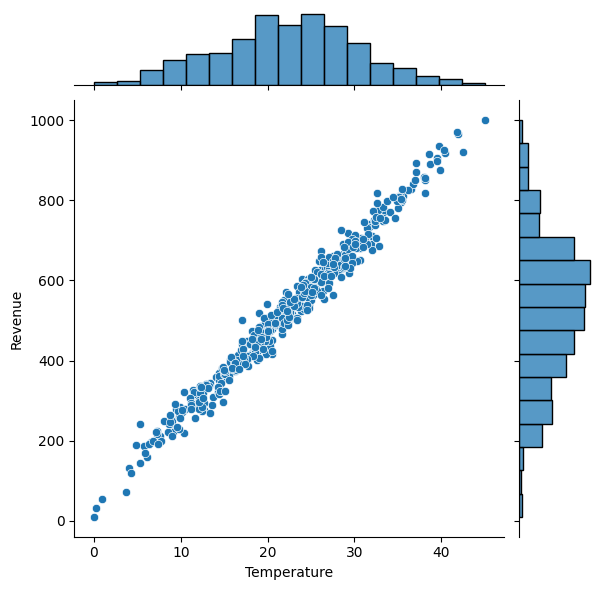

In [ ]:
sns.jointplot(x="Temperature", y="Revenue", data=df_helados)

### 2.2 Preparando los datos
Particionando el dataset para la creación de modelos. Esto mediante la función `train_test_split` de scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]
y = df_helados["Revenue"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


### 2.3 modelo de regresión lineal
Emplearemos el modelo `LinearRegression` de scikit-learn para ajustar los datos

In [ ]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")


La pendiente del modelo (B) es: [21.33277916], el intersecto (A) es 47.53641930832788


### 2.4 Evaluación del modelo

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

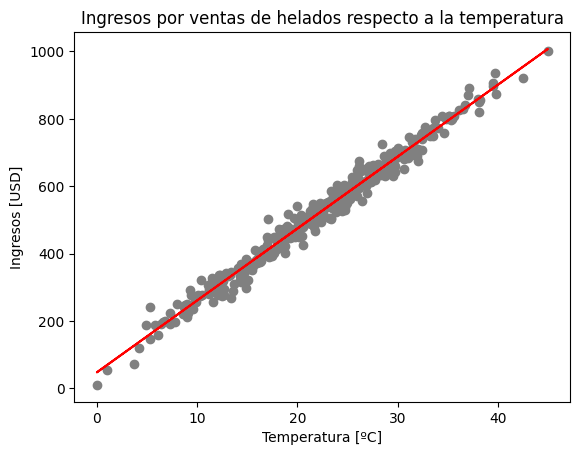

In [ ]:
import matplotlib.pyplot as plt
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

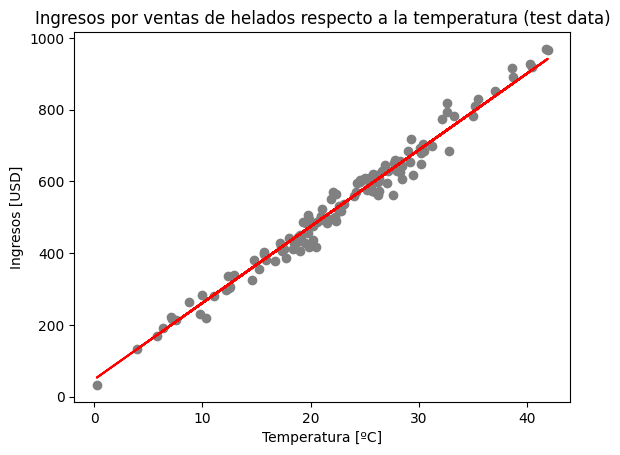

In [ ]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')



### Error medio cuadrático
Es una de las medidas más empleadas como función de pérdida en los algoritmos de regresión. Mide la distancia cuadrática entre una predicción del modelo respecto al dato correspondiente en el conjunto de datos para todos los puntos que tenga el conjunto de datos. Luego calcula el promedio de esas distancias.



In [ ]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))


Mean Squared Error: 718.0968198267309
Root Mean Squared Error: 26.79732859496877
Mean Absolute Error: 21.45319168078474


# Error medio absoluto
Es la diferencia entre los valores estimados y los reales. Se calcula el promedio de todas las diferencias para encontrar el valor del error


## Tarea:

Error cuadratico medio == mse (mean squared error)

```
# Error medio absoluto == mae (mean_absolute_error)

absolute = abs() en Python

| x | = +x, si x>=0
| x | = -x, si x<=0

Ejemplo:
| (5) | = +(5) = +5 = 5
| (-5) | = -(-5) = +5 = 5

15 = | 40 - 25 | = | 15 | = 15
15 = | 25 - 40 | = | -15 | = -(-15)= 15

def get_mean_absolute_error(y_real, y_pred):
  mae = | (y_real) - (y_pred) |
  # mae = | (y_pred) - (y_real) |
  return mae
```


RECORDAR HACER LA GRÁFICA DE LA DISTRUBUCIÓN DE LOS RESIDUOS (histograma de error)


In [ ]:
import numpy as np

# Mean Absolute Error
def get_mae(y_test: pd.core.series.Series ,y_pred: pd.core.series.Series):
  mae = np.abs(y_test - y_pred).mean()
  #mae = round(mae, 3)
  return mae

#Mean Squared Error
def get_mse(y_test: pd.core.series.Series ,y_pred: pd.core.series.Series):
  sum = np.sum((y_test - y_pred)**2)
  mse = sum/len(y_test)
  #return mse.round(3)
  return mse

#Root Mean Squared Error
def get_rmse(y_test: pd.core.series.Series ,y_pred: pd.core.series.Series):
  mse = get_mse(y_test, y_pred)
  rmse = np.sqrt(mse)
  #return rmse.round(3)
  return rmse

In [ ]:

print("Error cuadrático medio:", get_mse(y_test,y_pred))
print("Raiz del error cuadrático medio:", get_rmse(y_test,y_pred))
print("Error medio absoluto:", get_mae(y_test,y_pred))

Error cuadrático medio: 718.0968198267309
Raiz del error cuadrático medio: 26.79732859496877
Error medio absoluto: 21.45319168078474


Mean Squared Error: 718.0968198267309
Root Mean Squared Error: 26.79732859496877
Mean Absolute Error: 21.45319168078474